In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
! pip install pandas-datareader
! pip install yfinance
! pip install pykrx
! pip install mpl_finance
! pip install mplfinance
! pip install cufflinks
! pip install chart_studio
! pip install plotly
! pip install Analyzer
! pip install backtrader
! pip install backtesting

In [203]:
import pandas as pd
import datetime as dt
from pykrx import stock
from pykrx import bond
import matplotlib as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings(action='ignore')


#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [12, 8] # [width, height] (inches)
plt.rc('font', family='Malgun Gothic')

sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



In [204]:
코스피리스트 = pd.read_csv("/content/drive/MyDrive/컨트롤엔터산악회/백테스팅/코스피A리스트.csv")

In [205]:
코스피리스트['종목코드'] = 코스피리스트['code'].str.extract(r'(\d\d\d\d\d\d)')

In [206]:
earning = pd.read_csv("/content/drive/MyDrive/컨트롤엔터산악회/백테스팅/총기법종목선정수익률.csv")

In [207]:
earning [ earning["재무비율방식"] == "레버리지기법" ]

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
18,20050401,20060322,"['삼성전자', 'KT&G', '삼성SDI', '아모레G', '농심']",0.166422,1.166422,레버리지기법,2005
19,20060404,20070326,"['KT&G', 'NAVER', '아모레G', '롯데지주', '에스원']",0.016899,1.203031,레버리지기법,2006
20,20070404,20080324,"['KT&G', '현대미포조선', '롯데지주', '롯데칠성', '에스원']",0.198403,1.640118,레버리지기법,2007
21,20080321,20090311,"['NAVER', '현대미포조선', '아모레퍼시픽', '에스원', 'SBS']",-0.164384,1.206126,레버리지기법,2008
22,20090323,20100315,"['아모레퍼시픽', '유한양행', '엔씨소프트', '제일기획', '동서']",0.377132,2.038127,레버리지기법,2009
23,20100503,20110425,"['아모레퍼시픽', '엔씨소프트', '제일기획', '동서', '아모레G']",0.304392,2.962908,레버리지기법,2010
24,20110329,20120319,"['LG화학', '롯데정밀화학', '유한양행', '현대그린푸드', 'LF']",0.073992,3.256133,레버리지기법,2011
25,20120322,20130312,"['엔씨소프트', '롯데정밀화학', '현대그린푸드', '유한양행', '한섬']",-0.011284,3.208106,레버리지기법,2012
26,20130412,20140402,"['LG생활건강', '셀트리온', '아모레G', '현대그린푸드', '동서']",0.121236,3.718279,레버리지기법,2013
27,20140404,20150325,"['NAVER', 'KT&G', '아모레퍼시픽', '고려아연', '아모레G']",0.528365,6.211255,레버리지기법,2014


In [208]:
earning [ earning["재무비율방식"] == "레버리지기법" ]['시작날짜'] = earning [ earning["재무비율방식"] == "레버리지기법" ]['시작날짜'].astype(str)
earning [ earning["재무비율방식"] == "레버리지기법" ]['매도날짜'] = earning [ earning["재무비율방식"] == "레버리지기법" ]['매도날짜'].astype(str)

In [209]:
시작날짜_list = earning [ earning["재무비율방식"] == "레버리지기법" ]['시작날짜'].tolist()

In [210]:
# 시작날짜_list

In [211]:
시작날짜_list = [str(x) for x in 시작날짜_list]
시작날짜_list

['20050401',
 '20060404',
 '20070404',
 '20080321',
 '20090323',
 '20100503',
 '20110329',
 '20120322',
 '20130412',
 '20140404',
 '20150320',
 '20160323',
 '20170324',
 '20180323',
 '20190322',
 '20200401',
 '20210401',
 '20220324']

In [212]:
from datetime import datetime, timedelta
# from datetime import timedelta
매수날짜_list = []
for 시작 in 시작날짜_list:
            
    날짜 = dt.datetime.strptime(시작,"%Y%m%d")
    날짜 = 날짜 + timedelta(days=-290)
    Y = dt.datetime.strftime(날짜,'%Y')
    M =dt.datetime.strftime(날짜,'%m')
    D = dt.datetime.strftime(날짜,'%d')
    시작날짜 = Y+M+D
    매수날짜_list.append(시작날짜)

매수날짜_list

['20040615',
 '20050618',
 '20060618',
 '20070605',
 '20080606',
 '20090717',
 '20100612',
 '20110606',
 '20120626',
 '20130618',
 '20140603',
 '20150607',
 '20160607',
 '20170606',
 '20180605',
 '20190616',
 '20200615',
 '20210607']

In [213]:
from datetime import datetime, timedelta
매도날짜_list = []
for 매도 in 매수날짜_list:
        
    날짜 = dt.datetime.strptime(매도,"%Y%m%d")
    Y = dt.datetime.strftime(날짜,'%Y')
    # M =dt.datetime.strftime(날짜,'%m')
    # D = dt.datetime.strftime(날짜,'%d')
    Y =int(Y)+2
    Y = str(Y)
    매도날짜 = Y+'0331'
    매도날짜_list.append(매도날짜)
매도날짜_list

['20060331',
 '20070331',
 '20080331',
 '20090331',
 '20100331',
 '20110331',
 '20120331',
 '20130331',
 '20140331',
 '20150331',
 '20160331',
 '20170331',
 '20180331',
 '20190331',
 '20200331',
 '20210331',
 '20220331',
 '20230331']

In [214]:
test0 = earning['포트폴리오종목명'][ earning["재무비율방식"] == "레버리지기법" ].tolist()[0]
type(test0)
test0

"['삼성전자', 'KT&G', '삼성SDI', '아모레G', '농심']"

In [215]:
import ast
test0 = ast.literal_eval(test0)

In [216]:
test0

['삼성전자', 'KT&G', '삼성SDI', '아모레G', '농심']

In [217]:
stocks = ['셀트리온', 'LG생활건강', '엔씨소프트', '롯데정밀화학', '삼양식품']
code_list = []

for 종목 in test0:
    code_list.append(코스피리스트['종목코드'][코스피리스트['company']== 종목].tolist())
code_list = sum(code_list,[])
code_list

['005930', '033780', '006400', '002790', '004370']

In [218]:
df = stock.get_market_ohlcv(매수날짜_list[0], 매도날짜_list[0], code_list[0])
df.columns = ['open', 'high', 'low', 'close', 'volume']
last_date=df.index.tolist()[-2]
print(last_date)
df.tail()

2006-03-30 00:00:00


,open,high,low,close,volume
날짜,,,,,
2006-03-27,12100,12580,12100,12480,398073
2006-03-28,12320,12600,12320,12560,303389
2006-03-29,12420,12520,12300,12520,307420
2006-03-30,12640,12680,12360,12460,298336
2006-03-31,12400,12600,12360,12600,417979


In [219]:
datalist = []
for i in range(0, len(code_list)):
    df = stock.get_market_ohlcv(매수날짜_list[0], 매도날짜_list[0], code_list[i])
    df.columns = ['open', 'high', 'low', 'close', 'volume'] 
    datalist.append(df)
    # data = bt.feeds.PandasData(dataname=datalist[i]) 
    # cerebro.adddata(data, name=stocks[i])

In [220]:
# datalist

# 200일선 기준 백테스팅


In [221]:
from datetime import datetime
from datetime import timedelta
import backtrader as bt
import pandas as pd
from backtrader import cerebro
from pandas.io.formats import style
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [222]:
## Quick Start Guide

# Create a Stratey
class MyStrategy200(bt.Strategy):
    params = (
        ('maperiod', 200),
    )

    def log(self, txt, dt=None):
        
        ''' Logging function fot this strategy'''
        ref = len(self)    #현재라인의 번호표기용
        dt = dt or self.datas[0].datetime.date(0)
        
        print( ref,'%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        # 종가
        self.dataclose = self.datas[0].close
     
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # 200일 이동평균선
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

        # Indicators for the plotting show
        # bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        # bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
        #                                     subplot=True)
        # bt.indicators.StochasticSlow(self.datas[0])
        # bt.indicators.MACDHisto(self.datas[0])
        # rsi = bt.indicators.RSI(self.datas[0])
        # bt.indicators.SmoothedMovingAverage(rsi, period=10)
        # bt.indicators.ATR(self.datas[0], plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
            
            else:
                if  self.datas[0].datetime.date(0) ==last_date:

                    # SELL, SELL, SELL!!! (with all possible default parameters)
                    self.log('SELL CREATE, %.2f' % self.dataclose[0])

                    # Keep track of the created order to avoid a 2nd order
                    self.order = self.sell()

                else:
                    pass

    def backtesting(매수날짜,매도날짜,종목코드):

        data_list = []
        
        
                    
        날짜 = dt.datetime.strptime(매수날짜,"%Y%m%d")
        날짜 = 날짜 + timedelta(days=-299)
        Y = dt.datetime.strftime(날짜,'%Y')
        M =dt.datetime.strftime(날짜,'%m')
        D = dt.datetime.strftime(날짜,'%d')
        시작날짜 = Y+M+D
        매수시작날짜 = 시작날짜

        
                

        # Create a cerebro
        cerebro = bt.Cerebro()

        # Strategy
        cerebro.addstrategy(MyStrategy200)


        # Data
        df = stock.get_market_ohlcv(매수시작날짜, 매도날짜, 종목코드)
        df.columns = ['open', 'high', 'low', 'close', 'volume']




        # Feed Data
        data = bt.feeds.PandasData(dataname=df,
                                    #fromdate=datetime.datetime(2000, 1, 1), # Do not pass values before this date
                                    #todate=datetime.datetime(2021, 12, 31), # Do not pass values before this date
                                    #reverse=False  # Do not pass values after this date
                                    )

        cerebro.adddata(data)

        # Set cash
        cerebro.broker.setcash(20000000)

        # Add a FixedSize sizer according to the stake
        # cerebro.addsizer(bt.sizers.FixedSize, stake=2)
        cerebro.addsizer(bt.sizers.AllInSizerInt)

        # Set the commission
        cerebro.broker.setcommission(commission=0.00015)

        # Print out the starting conditions
        print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

        # Run over everything
        # 6. 평가지표 추가
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
        cerebro.addanalyzer(bt.analyzers.Returns)
        cerebro.addanalyzer(bt.analyzers.DrawDown)
        # 7. 백테스트 시작
        results = cerebro.run()
        # 8. 평가 결과 report
        평가_list = []
        analyzers = results[0].analyzers
        mdd = analyzers.drawdown.get_analysis()['max']['drawdown']
        cagr = analyzers.returns.get_analysis()['rnorm100']
        sharp = analyzers.sharperatio.get_analysis()['sharperatio']
        print(f"mdd : {mdd:.2f}, cagr: {cagr:.2f}, sharp: {sharp:.2f}")

        # Print out the final result
        portvalue = cerebro.broker.getvalue() 
        PNL = portvalue - 20000000 #Print out the final result 
        print('Final Portfolio Value: {:.2f}원'.format(portvalue)) 
        print('P/L: {:.2f}원'.format(PNL)) 
        print((portvalue-20000000)/20000000 * 100,'%') 
        평가_list.append(종목코드)
        평가_list.append(mdd)
        평가_list.append(cagr)
        평가_list.append(sharp)
        평가_list.append(portvalue)
        평가_list.append(PNL)
        평가_list.append((portvalue-20000000)/20000000*100)
        data_list.append(평가_list)


        # Plot the result
        cerebro.plot(style='candle', barup='red', bardown='blue')
        figure = cerebro.plot(volume=False, width=25, height=25)[0][0]
        figure.savefig('example_sma.png')
        img = cv2.imread('/content/example_sma.png', cv2.IMREAD_COLOR)
        

        return data_list,img







# 20일선기준 백테스팅

In [223]:
class MyStrategy20(bt.Strategy):
    params = (
        ('maperiod', 20),
    )

    def log(self, txt, dt=None):
        
        ''' Logging function fot this strategy'''
        ref = len(self)    #현재라인의 번호표기용
        dt = dt or self.datas[0].datetime.date(0)
        
        print( ref,'%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        # 종가
        self.dataclose = self.datas[0].close
     
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # 20일 이동평균선
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0],  period=self.params.maperiod)

        # Indicators for the plotting show
        # bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        # bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
        #                                     subplot=True)
        # bt.indicators.StochasticSlow(self.datas[0])
        # bt.indicators.MACDHisto(self.datas[0])
        # rsi = bt.indicators.RSI(self.datas[0])
        # bt.indicators.SmoothedMovingAverage(rsi, period=10)
        # bt.indicators.ATR(self.datas[0], plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
            
            else:
                if  self.datas[0].datetime.date(0) ==last_date:

                    # SELL, SELL, SELL!!! (with all possible default parameters)
                    self.log('SELL CREATE, %.2f' % self.dataclose[0])

                    # Keep track of the created order to avoid a 2nd order
                    self.order = self.sell()

                else:
                    pass

    def backtesting(매수날짜,매도날짜,종목코드):

        data_list = []
        
        
                    
        날짜 = dt.datetime.strptime(매수날짜,"%Y%m%d")
        날짜 = 날짜 + timedelta(days=-30)
        Y = dt.datetime.strftime(날짜,'%Y')
        M =dt.datetime.strftime(날짜,'%m')
        D = dt.datetime.strftime(날짜,'%d')
        시작날짜 = Y+M+D
        매수시작날짜 = 시작날짜

        
                

        # Create a cerebro
        cerebro = bt.Cerebro()

        # Strategy
        cerebro.addstrategy(MyStrategy20)


        # Data
        df = stock.get_market_ohlcv(매수시작날짜, 매도날짜, 종목코드)
        df.columns = ['open', 'high', 'low', 'close', 'volume']
        last_date=df.index.tolist()[-2]




        # Feed Data
        data = bt.feeds.PandasData(dataname=df,
                                    #fromdate=datetime.datetime(2000, 1, 1), # Do not pass values before this date
                                    #todate=datetime.datetime(2021, 12, 31), # Do not pass values before this date
                                    #reverse=False  # Do not pass values after this date
                                    )

        cerebro.adddata(data)

        # Set cash
        cerebro.broker.setcash(20000000)

        # Add a FixedSize sizer according to the stake
        # cerebro.addsizer(bt.sizers.FixedSize, stake=2)
        cerebro.addsizer(bt.sizers.AllInSizerInt)

        # Set the commission
        cerebro.broker.setcommission(commission=0.00015)

        # Print out the starting conditions
        print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

        # Run over everything
        # 6. 평가지표 추가
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
        cerebro.addanalyzer(bt.analyzers.Returns)
        cerebro.addanalyzer(bt.analyzers.DrawDown)
        # 7. 백테스트 시작
        results = cerebro.run()
        # 8. 평가 결과 report
        평가_list = []
        analyzers = results[0].analyzers
        mdd = analyzers.drawdown.get_analysis()['max']['drawdown']
        cagr = analyzers.returns.get_analysis()['rnorm100']
        sharp = analyzers.sharperatio.get_analysis()['sharperatio']
        print(f"mdd : {mdd:.2f}, cagr: {cagr:.2f}, sharp: {sharp:.2f}")

        # Print out the final result
        portvalue = cerebro.broker.getvalue() 
        PNL = portvalue - 20000000 #Print out the final result 
        print('Final Portfolio Value: {:.2f}원'.format(portvalue)) 
        print('P/L: {:.2f}원'.format(PNL)) 
        print((portvalue-20000000)/20000000 * 100,'%') 
        평가_list.append(종목코드)
        평가_list.append(mdd)
        평가_list.append(cagr)
        평가_list.append(sharp)
        평가_list.append(portvalue)
        평가_list.append(PNL)
        평가_list.append((portvalue-20000000)/20000000*100)
        data_list.append(평가_list)


        # Plot the result
        cerebro.plot(style='candle', barup='red', bardown='blue')
        figure = cerebro.plot(volume=False, width=25, height=25)[0][0]
        figure.savefig('example_sma.png')
        img = cv2.imread('/content/example_sma.png', cv2.IMREAD_COLOR)
        

        return data_list,img

# 60일선기준 백테스팅

In [224]:
class MyStrategy60(bt.Strategy):
    params = (
        ('maperiod', 60),
    )

    def log(self, txt, dt=None):
        
        ''' Logging function fot this strategy'''
        ref = len(self)    #현재라인의 번호표기용
        dt = dt or self.datas[0].datetime.date(0)
        
        print( ref,'%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        # 종가
        self.dataclose = self.datas[0].close
     
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # 60일 이동평균선
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0],  period=self.params.maperiod)

        # Indicators for the plotting show
        # bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        # bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
        #                                     subplot=True)
        # bt.indicators.StochasticSlow(self.datas[0])
        # bt.indicators.MACDHisto(self.datas[0])
        # rsi = bt.indicators.RSI(self.datas[0])
        # bt.indicators.SmoothedMovingAverage(rsi, period=10)
        # bt.indicators.ATR(self.datas[0], plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
            
            else:
                if  self.datas[0].datetime.date(0) ==last_date:

                    # SELL, SELL, SELL!!! (with all possible default parameters)
                    self.log('SELL CREATE, %.2f' % self.dataclose[0])

                    # Keep track of the created order to avoid a 2nd order
                    self.order = self.sell()

                else:
                    pass

    def backtesting(매수날짜,매도날짜,종목코드):

        data_list = []
        
        
                    
        날짜 = dt.datetime.strptime(매수날짜,"%Y%m%d")
        날짜 = 날짜 + timedelta(days=-95)
        Y = dt.datetime.strftime(날짜,'%Y')
        M =dt.datetime.strftime(날짜,'%m')
        D = dt.datetime.strftime(날짜,'%d')
        시작날짜 = Y+M+D
        매수시작날짜 = 시작날짜

        
                

        # Create a cerebro
        cerebro = bt.Cerebro()

        # Strategy
        cerebro.addstrategy(MyStrategy60)


        # Data
        df = stock.get_market_ohlcv(매수시작날짜, 매도날짜, 종목코드)
        df.columns = ['open', 'high', 'low', 'close', 'volume']
        last_date=df.index.tolist()[-2]




        # Feed Data
        data = bt.feeds.PandasData(dataname=df,
                                    #fromdate=datetime.datetime(2000, 1, 1), # Do not pass values before this date
                                    #todate=datetime.datetime(2021, 12, 31), # Do not pass values before this date
                                    #reverse=False  # Do not pass values after this date
                                    )

        cerebro.adddata(data)

        # Set cash
        cerebro.broker.setcash(20000000)

        # Add a FixedSize sizer according to the stake
        # cerebro.addsizer(bt.sizers.FixedSize, stake=2)
        cerebro.addsizer(bt.sizers.AllInSizerInt)

        # Set the commission
        cerebro.broker.setcommission(commission=0.00015)

        # Print out the starting conditions
        print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

        # Run over everything
        # 6. 평가지표 추가
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
        cerebro.addanalyzer(bt.analyzers.Returns)
        cerebro.addanalyzer(bt.analyzers.DrawDown)
        # 7. 백테스트 시작
        results = cerebro.run()
        # 8. 평가 결과 report
        평가_list = []
        analyzers = results[0].analyzers
        mdd = analyzers.drawdown.get_analysis()['max']['drawdown']
        cagr = analyzers.returns.get_analysis()['rnorm100']
        sharp = analyzers.sharperatio.get_analysis()['sharperatio']
        print(f"mdd : {mdd:.2f}, cagr: {cagr:.2f}, sharp: {sharp:.2f}")

        # Print out the final result
        portvalue = cerebro.broker.getvalue() 
        PNL = portvalue - 20000000 #Print out the final result 
        print('Final Portfolio Value: {:.2f}원'.format(portvalue)) 
        print('P/L: {:.2f}원'.format(PNL)) 
        print((portvalue-20000000)/20000000 * 100,'%') 
        평가_list.append(종목코드)
        평가_list.append(mdd)
        평가_list.append(cagr)
        평가_list.append(sharp)
        평가_list.append(portvalue)
        평가_list.append(PNL)
        평가_list.append((portvalue-20000000)/20000000*100)
        data_list.append(평가_list)


        # Plot the result
        cerebro.plot(style='candle', barup='red', bardown='blue')
        figure = cerebro.plot(volume=False, width=25, height=25)[0][0]
        figure.savefig('example_sma.png')
        img = cv2.imread('/content/example_sma.png', cv2.IMREAD_COLOR)
        

        return data_list,img

# 120일선기준 백테스팅

In [288]:
#  backtest_list = []  #--------------백테스트 결과 저장 df

In [285]:

class MyStrategy120(bt.Strategy):
    params = (
        ('maperiod', 120),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        ref = len(self)    #현재라인의 번호표기용
        dt = dt or self.datas[0].datetime.date(0)

        dict = {}
        dict['dt_date'] = dt.isoformat()
        dict['msg'] = txt
        backtest_list.append(dict)   #[{'dt_date': '2018-01-02', 'msg': 'Close, 66500.00'}, {'dt_date': '2018-01-02', 'msg': 'BUY CREATE, 66500.00'},.... ]

        print( ref,'%s, %s' % (dt.isoformat(), txt))
        #print(backtest_list)

    def __init__(self):
        # 종가
        self.dataclose = self.datas[0].close
     
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None
       
        # 120일 이동평균선
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0],  period=self.params.maperiod)

        # Indicators for the plotting show
        # bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        # bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
        #                                     subplot=True)
        # bt.indicators.StochasticSlow(self.datas[0])
        # bt.indicators.MACDHisto(self.datas[0])
        # rsi = bt.indicators.RSI(self.datas[0])
        # bt.indicators.SmoothedMovingAverage(rsi, period=10)
        # bt.indicators.ATR(self.datas[0], plot=False)

    
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
            
            else:
                if  self.datas[0].datetime.date(0) ==last_date:

                    # SELL, SELL, SELL!!! (with all possible default parameters)
                    self.log('SELL CREATE, %.2f' % self.dataclose[0])

                    # Keep track of the created order to avoid a 2nd order
                    self.order = self.sell()

                else:
                    pass
    #-------------------------------------------------------------------------------------
    def backtesting(매수날짜,매도날짜,종목코드):

        data_list = []
        # backtest_list = [] 
        
                    
        날짜 = dt.datetime.strptime(매수날짜,"%Y%m%d")
        날짜 = 날짜 + timedelta(days=-180)
        Y = dt.datetime.strftime(날짜,'%Y')
        M =dt.datetime.strftime(날짜,'%m')
        D = dt.datetime.strftime(날짜,'%d')
        시작날짜 = Y+M+D
        매수시작날짜 = 시작날짜

        
                

        # Create a cerebro
        cerebro = bt.Cerebro()

        # Strategy
        cerebro.addstrategy(MyStrategy120)


        # Data
        df = stock.get_market_ohlcv(매수시작날짜, 매도날짜, 종목코드)
        df.columns = ['open', 'high', 'low', 'close', 'volume']
        last_date=df.index.tolist()[-2]




        # Feed Data
        data = bt.feeds.PandasData(dataname=df,
                                    #fromdate=datetime.datetime(2000, 1, 1), # Do not pass values before this date
                                    #todate=datetime.datetime(2021, 12, 31), # Do not pass values before this date
                                    #reverse=False  # Do not pass values after this date
                                    )

        cerebro.adddata(data)

        # Set cash
        cerebro.broker.setcash(20000000)

        # Add a FixedSize sizer according to the stake
        # cerebro.addsizer(bt.sizers.FixedSize, stake=2)
        cerebro.addsizer(bt.sizers.AllInSizerInt)

        # Set the commission
        cerebro.broker.setcommission(commission=0.00015)

        # Print out the starting conditions
        print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

        # Run over everything
        # 6. 평가지표 추가
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
        cerebro.addanalyzer(bt.analyzers.Returns)
        cerebro.addanalyzer(bt.analyzers.DrawDown)
        # 7. 백테스트 시작
        results = cerebro.run()
        # 8. 평가 결과 report
        평가_list = []
        analyzers = results[0].analyzers
        mdd = analyzers.drawdown.get_analysis()['max']['drawdown']
        cagr = analyzers.returns.get_analysis()['rnorm100']
        sharp = analyzers.sharperatio.get_analysis()['sharperatio']
        print(f"mdd : {mdd:.2f}, cagr: {cagr:.2f}, sharp: {sharp:.2f}")

        # Print out the final result
        portvalue = cerebro.broker.getvalue() 
        PNL = portvalue - 20000000 #Print out the final result 
        print('Final Portfolio Value: {:.2f}원'.format(portvalue)) 
        print('P/L: {:.2f}원'.format(PNL)) 
        print((portvalue-20000000)/20000000 * 100,'%') 
        평가_list.append(종목코드)
        평가_list.append(mdd)
        평가_list.append(cagr)
        평가_list.append(sharp)
        평가_list.append(portvalue)
        평가_list.append(PNL)
        평가_list.append((portvalue-20000000)/20000000*100)
        data_list.append(평가_list)


        # Plot the result
        cerebro.plot(style='candle', barup='red', bardown='blue')
        figure = cerebro.plot(volume=False, width=25, height=25)[0][0]
        figure.savefig('example_sma.png')
        plt.show()
        img = cv2.imread('/content/example_sma.png', cv2.IMREAD_COLOR)
        

        return data_list,img

926


,dt_date,msg
0,2018-01-02,"Close, 66500.00"
1,2018-01-02,"BUY CREATE, 66500.00"
2,2018-01-03,"BUY EXECUTED, Price: 65400.00, Cost: 19620000.00, Comm 2943.00"
3,2018-01-03,"Close, 64900.00"
4,2018-01-04,"Close, 64300.00"


Starting Portfolio Value: 20000000.00
120 2018-01-02, Close, 66500.00
120 2018-01-02, BUY CREATE, 66500.00
121 2018-01-03, BUY EXECUTED, Price: 65400.00, Cost: 19620000.00, Comm 2943.00
121 2018-01-03, Close, 64900.00
122 2018-01-04, Close, 64300.00
123 2018-01-05, Close, 69000.00
124 2018-01-08, Close, 71700.00
125 2018-01-09, Close, 68500.00
126 2018-01-10, Close, 66800.00
127 2018-01-11, Close, 66000.00
128 2018-01-12, Close, 69000.00
129 2018-01-15, Close, 68000.00
130 2018-01-16, Close, 67300.00
131 2018-01-17, Close, 67500.00
132 2018-01-18, Close, 66800.00
133 2018-01-19, Close, 67200.00
134 2018-01-22, Close, 67400.00
135 2018-01-23, Close, 68100.00
136 2018-01-24, Close, 68900.00
137 2018-01-25, Close, 70000.00
138 2018-01-26, Close, 72400.00
139 2018-01-29, Close, 72800.00
140 2018-01-30, Close, 76000.00
141 2018-01-31, Close, 76800.00
142 2018-02-01, Close, 74900.00
143 2018-02-02, Close, 75700.00
144 2018-02-05, Close, 73900.00
145 2018-02-06, Close, 73500.00
146 2018-02-07

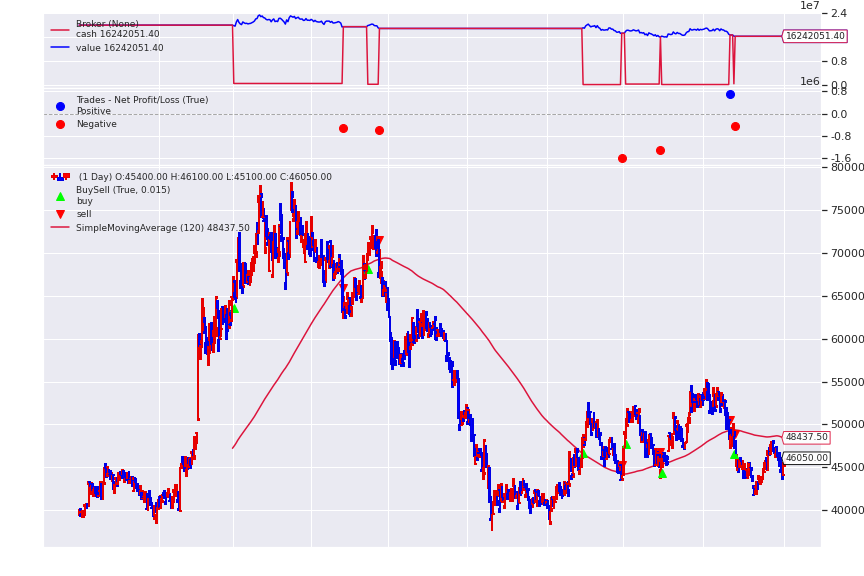

In [286]:
backtest_list = [] 
data_list, img  = MyStrategy120.backtesting('20180101','20191001','004000')
print('종목코드','mdd','cagr','sharp','portvalue','PNL','수익률')
print(data_list)
cv2_imshow(img)

In [287]:
backdf = pd.DataFrame(backtest_list)
backdf.head()
# backdf.to_csv("dddd.csv", index=False)

,dt_date,msg
0,2018-01-02,"Close, 66500.00"
1,2018-01-02,"BUY CREATE, 66500.00"
2,2018-01-03,"BUY EXECUTED, Price: 65400.00, Cost: 19620000.00, Comm 2943.00"
3,2018-01-03,"Close, 64900.00"
4,2018-01-04,"Close, 64300.00"


In [291]:
# backdf['msg'].tolist()

In [266]:
# plotly drive : https://plotly.com/~opencv.korea
# < iframe width="900" height="800" frameborder="0" scrolling="no" src="https://plotly.com/~opencv.korea/3.embed">

import plotly.graph_objects as go
import plotly.io as pio
import chart_studio
chart_studio.tools.set_credentials_file(username='kangho7009', api_key='ovpPCXmmGeTQcD4LQVVr')

# fig = go.Figure()
figure.show()
# fig.update_layout(title_text='hello world')
pio.write_html(figure, file='./lec00_hello_world222.html', auto_open=True)

ValueError: ignored

In [249]:
configure_plotly_browser_state()

In [ ]:
plotly.offline.plot_mpl(figure, filename='simple_candlestick.html')

In [ ]:
import plotly

In [ ]:
매수날짜 = "20200101" 
매도날짜 = "20220301"
종목코드 = "005930"

In [ ]:
def backtesting(매수날짜,매도날짜,종목코드):

    data_list = []
    
    
                
    날짜 = dt.datetime.strptime(매수날짜,"%Y%m%d")
    날짜 = 날짜 + timedelta(days=-293)
    Y = dt.datetime.strftime(날짜,'%Y')
    M =dt.datetime.strftime(날짜,'%m')
    D = dt.datetime.strftime(날짜,'%d')
    시작날짜 = Y+M+D
    매수시작날짜 = 시작날짜

    
            

    # Create a cerebro
    cerebro = bt.Cerebro()

    # Strategy
    cerebro.addstrategy(MyStrategy)


    # Data
    df = stock.get_market_ohlcv(매수시작날짜, 매도날짜, 종목코드)
    df.columns = ['open', 'high', 'low', 'close', 'volume']




    # Feed Data
    data = bt.feeds.PandasData(dataname=df,
                                #fromdate=datetime.datetime(2000, 1, 1), # Do not pass values before this date
                                #todate=datetime.datetime(2021, 12, 31), # Do not pass values before this date
                                #reverse=False  # Do not pass values after this date
                                )

    cerebro.adddata(data)

    # Set cash
    cerebro.broker.setcash(20000000)

    # Add a FixedSize sizer according to the stake
    # cerebro.addsizer(bt.sizers.FixedSize, stake=2)
    cerebro.addsizer(bt.sizers.AllInSizerInt)

    # Set the commission
    cerebro.broker.setcommission(commission=0.00015)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    # 6. 평가지표 추가
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    # 7. 백테스트 시작
    results = cerebro.run()
    # 8. 평가 결과 report
    평가_list = []
    analyzers = results[0].analyzers
    mdd = analyzers.drawdown.get_analysis()['max']['drawdown']
    cagr = analyzers.returns.get_analysis()['rnorm100']
    sharp = analyzers.sharperatio.get_analysis()['sharperatio']
    print(f"mdd : {mdd:.2f}, cagr: {cagr:.2f}, sharp: {sharp:.2f}")

    # Print out the final result
    portvalue = cerebro.broker.getvalue() 
    PNL = portvalue - 20000000 #Print out the final result 
    print('Final Portfolio Value: {:.2f}원'.format(portvalue)) 
    print('P/L: {:.2f}원'.format(PNL)) 
    print((portvalue-20000000)/20000000 * 100,'%') 
    평가_list.append(종목코드)
    평가_list.append(mdd)
    평가_list.append(cagr)
    평가_list.append(sharp)
    평가_list.append(portvalue)
    평가_list.append(PNL)
    평가_list.append((portvalue-20000000)/20000000*100)
    data_list.append(평가_list)


    # Plot the result
    cerebro.plot(style='candle', barup='red', bardown='blue')
    figure = cerebro.plot(volume=False, width=25, height=25)[0][0]
    figure.savefig('example_sma.png')
    img = cv2.imread('/content/example_sma.png', cv2.IMREAD_COLOR)
    

    return data_list,img

In [ ]:
data_list,img = backtesting('20200101','20220301','005930')

In [ ]:
print(data_list)
cv2_imshow(img)

In [ ]:
print(data_list)
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/example_sma.png', cv2.IMREAD_COLOR)
cv2_imshow(img)

In [ ]:
## Quick Start Guide

# Create a Stratey
class MyStrategy(bt.Strategy):
    params = (
        ('maperiod', 200),
    )

    def log(self, txt, dt=None):
        
        ''' Logging function fot this strategy'''
        ref = len(self)    #현재라인의 번호표기용
        dt = dt or self.datas[0].datetime.date(0)
        
        print( ref,'%s, %s' % (dt.isoformat(), txt))
        
    def __init__(self):
        # 종가
        self.dataclose = self.datas[0].close
     
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # 200일 이동평균선
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

        # Indicators for the plotting show
        # bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        # bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
        #                                     subplot=True)
        # bt.indicators.StochasticSlow(self.datas[0])
        # bt.indicators.MACDHisto(self.datas[0])
        # rsi = bt.indicators.RSI(self.datas[0])
        # bt.indicators.SmoothedMovingAverage(rsi, period=10)
        # bt.indicators.ATR(self.datas[0], plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
            
            else:
                if  self.datas[0].datetime.date(0) ==last_date:

                    # SELL, SELL, SELL!!! (with all possible default parameters)
                    self.log('SELL CREATE, %.2f' % self.dataclose[0])

                    # Keep track of the created order to avoid a 2nd order
                    self.order = self.sell()

                else:
                    pass





if __name__ == '__main__':
    data_list = []
    for i, e  in enumerate(datalist):
            

        # Create a cerebro
        cerebro = bt.Cerebro()

        # Strategy
        cerebro.addstrategy(MyStrategy)


        # # Data
        # df = stock.get_market_ohlcv(시작날짜, "20220301", "003490")
        # df.columns = ['open', 'high', 'low', 'close', 'volume']

        
        
        
        # Feed Data
        data = bt.feeds.PandasData(dataname=datalist[i],
                                    #fromdate=datetime.datetime(2000, 1, 1), # Do not pass values before this date
                                    #todate=datetime.datetime(2021, 12, 31), # Do not pass values before this date
                                    #reverse=False  # Do not pass values after this date
                                    )
        
        cerebro.adddata(data)

        # Set cash
        cerebro.broker.setcash(20000000)

        # Add a FixedSize sizer according to the stake
        # cerebro.addsizer(bt.sizers.FixedSize, stake=2)
        cerebro.addsizer(bt.sizers.AllInSizerInt)

        # Set the commission
        cerebro.broker.setcommission(commission=0.00015)

        # Print out the starting conditions
        print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

        # Run over everything
        # 6. 평가지표 추가
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
        cerebro.addanalyzer(bt.analyzers.Returns)
        cerebro.addanalyzer(bt.analyzers.DrawDown)
        # 7. 백테스트 시작
        results = cerebro.run()
        # 8. 평가 결과 report
        평가_list = []
        analyzers = results[0].analyzers
        mdd = analyzers.drawdown.get_analysis()['max']['drawdown']
        cagr = analyzers.returns.get_analysis()['rnorm100']
        sharp = analyzers.sharperatio.get_analysis()['sharperatio']
        print(f"mdd : {mdd:.2f}, cagr: {cagr:.2f}, sharp: {sharp:.2f}")
    
        # Print out the final result
        portvalue = cerebro.broker.getvalue() 
        PNL = portvalue - 20000000 #Print out the final result 
        print('Final Portfolio Value: {:.2f}원'.format(portvalue)) 
        print('P/L: {:.2f}원'.format(PNL)) 
        print((portvalue-20000000)/20000000 * 100,'%') 
        평가_list.append(test0[i])
        평가_list.append(mdd)
        평가_list.append(cagr)
        평가_list.append(sharp)
        평가_list.append(portvalue)
        평가_list.append(PNL)
        평가_list.append((portvalue-20000000)/20000000*100)
        data_list.append(평가_list)
    
        
        # Plot the result
        cerebro.plot(style='candle', barup='red', bardown='blue')
        figure = cerebro.plot(volume=False, width=25, height=25)[0][0]
        figure.savefig('example_sma.png')

In [ ]:
data_list

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/example_sma.png', cv2.IMREAD_COLOR)
cv2_imshow(img)

In [ ]:
avdgsdgasdgasdgasdgasdga